In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Read data
myData = pd.read_csv("data.csv")
df = pd.DataFrame(data = myData)

In [3]:
df

date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0         7912     1.5           0     0          3        1340   
1         9050     2.0           0     4          5        3370   
2        11947     1.0           0     0          4        1930   
3         8030     1.0           0     0          4        1000   
4        10500     1.0           0     0          4        1140   
...        ...     ...         ...   ...        ...         ...   
4595      6360     1.0           0     0          4        1510   
4596      7573     2.0           0     0          3        1460   
4597      7014     2.0           0     0          3        3010   
4598      6630     1.0           0     0          3        1070   
4599      8102     2.0           0     0          4        1490   

      sqft_basement  yr_built  yr_renovated                    street  \
0                 0      1955          2005      18810 Densmore Ave N   
1               280      1921             0           709 W Blaine St   
2                 0      1966             0  26206-26214 143rd Ave SE   
3              1000      1963             0           857 170th Pl NE   
4               800      1976          1992         9105 170th Ave NE   
...             ...       ...           ...                       ...   
4595              0      1954          1979            501 N 143rd St   
4596              0      1983          2009          14855 SE 10th Pl   
4597              0      2009             0          759 Ilwaco Pl NE   
4598           1020      1974             0         5148 S Creston St   
4599              0      1990             0         18717 SE 258th St   

           city  statezip country  
0     Shoreline  WA 98133     USA  
1       Seattle  WA 98119     USA  
2          Kent  WA 98042     USA  
3      Bellevue  WA 98008     USA  
4       Redmond  WA 98052     USA  
...         ...       ...     ...  
4595    Seattle  WA 98133     USA  
4596   Bellevue  WA 98007     USA  
4597     Renton  WA 98059     USA  
4598    Seattle  WA 98178     USA  
4599  Covington  WA 98042     USA  

[4600 rows x 18 columns]

In [4]:
df["country"].unique()

array(['USA'], dtype=object)

In [5]:
df = df.drop(["date", "statezip", "street", "country"], axis=1)

In [34]:
df = pd.get_dummies(df)
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     3.130000e+05       3.0       1.50         1340      7912     1.5   
2     3.420000e+05       3.0       2.00         1930     11947     1.0   
3     4.200000e+05       3.0       2.25         2000      8030     1.0   
4     5.500000e+05       4.0       2.50         1940     10500     1.0   
5     4.900000e+05       2.0       1.00          880      6380     1.0   
6     3.350000e+05       2.0       2.00         1350      2560     1.0   
7     4.820000e+05       4.0       2.50         2710     35868     2.0   
8     4.525000e+05       3.0       2.50         2430     88426     1.0   
9     6.400000e+05       4.0       2.00         1520      6200     1.5   
10    4.630000e+05       3.0       1.75         1710      7320     1.0   
11    1.400000e+06       4.0       2.50         2920      4000     1.5   
12    5.885000e+05       3.0       1.75         2330     14892     1.0   
13    3.650000e+05       3.0       1.00         1090      6435     1.0   
14    1.200000e+06       5.0       2.75         2910      9480     1.5   
15    2.425000e+05       3.0       1.50         1200      9720     1.0   
16    4.190000e+05       3.0       1.50         1570      6700     1.0   
17    3.675000e+05       4.0       3.00         3110      7231     2.0   
18    2.579500e+05       3.0       1.75         1370      5858     1.0   
19    2.750000e+05       3.0       1.50         1180     10277     1.0   
20    7.500000e+05       3.0       1.75         2240     10578     2.0   
21    4.350000e+05       4.0       1.00         1450      8800     1.0   
22    6.260000e+05       3.0       2.25         1750      1572     2.5   
23    6.125000e+05       4.0       2.50         2730     12261     2.0   
24    4.950000e+05       4.0       1.75         1600      6380     1.0   
25    2.850000e+05       3.0       2.50         2090     10834     1.0   
26    6.150000e+05       3.0       1.75         2360      7291     1.0   
27    6.980000e+05       4.0       2.25         2200     11250     1.5   
28    6.750000e+05       5.0       2.50         2820     67518     2.0   
29    7.900000e+05       3.0       2.50         2600      4750     1.0   
30    3.825000e+05       4.0       1.75         1560      8700     1.0   
31    4.999500e+05       4.0       2.50         2860      3345     2.0   
32    6.500000e+05       4.0       2.00         1820      5000     1.5   
33    6.250000e+05       4.0       2.50         2820      8408     2.0   
34    4.000000e+05       4.0       2.50         3630     42884     1.5   
35    6.040000e+05       3.0       2.50         3240     33151     2.0   
36    4.400000e+05       2.0       1.00          800      4850     1.0   
37    2.872000e+05       3.0       3.00         1850     19966     1.0   
38    4.030000e+05       3.0       2.00         1960     13100     1.0   
39    7.500000e+05       3.0       2.50         2390      6550     1.0   
40    3.350000e+05       3.0       2.25         1580     16215     1.0   
41    2.600000e+05       4.0       2.00         1480      8625     1.0   
42    3.085000e+05       2.0       1.00          850      6174     1.0   
43    4.399500e+05       3.0       2.50         1770      2875     2.0   
44    2.350000e+05       2.0       1.00         1210      9400     1.0   
45    3.150000e+05       3.0       1.00         1160      9180     1.0   
46    4.375000e+05       3.0       2.25         1970     35100     2.0   
47    4.075000e+05       3.0       2.50         1930     10460     2.0   
48    4.457000e+05       3.0       2.50         1270      1180     3.0   
49    8.380000e+05       4.0       2.50         3310     42998     2.0   
50    6.300000e+05       4.0       2.75         2710     37277     2.0   
51    5.500000e+05       3.0       1.75         2910     35200     1.5   
52    8.050000e+05       3.0       2.00         2710      4500     1.5   
53    2.840000e+05       3.0       1.75         1800     23103     1.0   
54    4.700000e+0

In [33]:
pd.set_option('display.max_rows', df.shape[0]+1)
df["view"]

0       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      1
33      0
34      0
35      2
36      0
37      0
38      2
39      2
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      2
57      2
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      2
71      0
72      0
73      0
74      0
75      0
76      0
77      2
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      2
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      1
100     3


In [8]:
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price                         1.000000
sqft_living                   0.430410
sqft_above                    0.367570
bathrooms                     0.327110
sqft_living_devided_floors    0.276247
                                ...   
city_Des Moines              -0.049503
city_Maple Valley            -0.055803
city_Renton                  -0.080926
city_Federal Way             -0.084757
city_Auburn                  -0.089375
Name: price, Length: 63, dtype: float64

In [9]:

#cat_encoder = OneHotEncoder()


#to_enc = ["country", "city"]

#row_enc = cat_encoder.fit_transform(df[to_enc])
#column_name = cat_encoder.get_feature_names_out(to_enc)
#one_hot_encoded_frame =  pd.DataFrame(row_enc.todense(), columns= column_name)

#one_hot_encoded_frame

In [10]:
#df = df.join(one_hot_encoded_frame)
#df = df.drop(df[to_enc], axis=1)
#df = df.drop(["date", "statezip", "street", "country", "city"], axis=1)

In [11]:
df["price"].value_counts()

0.0          49
300000.0     42
400000.0     31
440000.0     29
450000.0     29
             ..
684680.0      1
609900.0      1
1635000.0     1
1339000.0     1
220600.0      1
Name: price, Length: 1741, dtype: int64

In [12]:
df = df.drop(df[(df.price == 0) | (df.price > 2000000)].index)

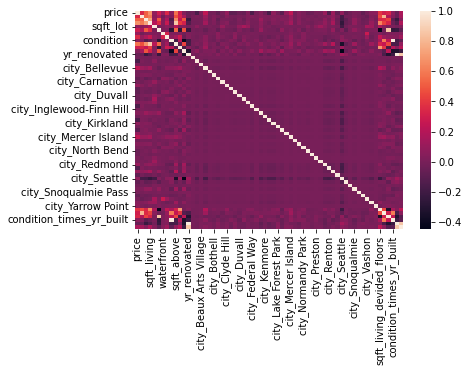

In [13]:
sns.heatmap(df.corr());

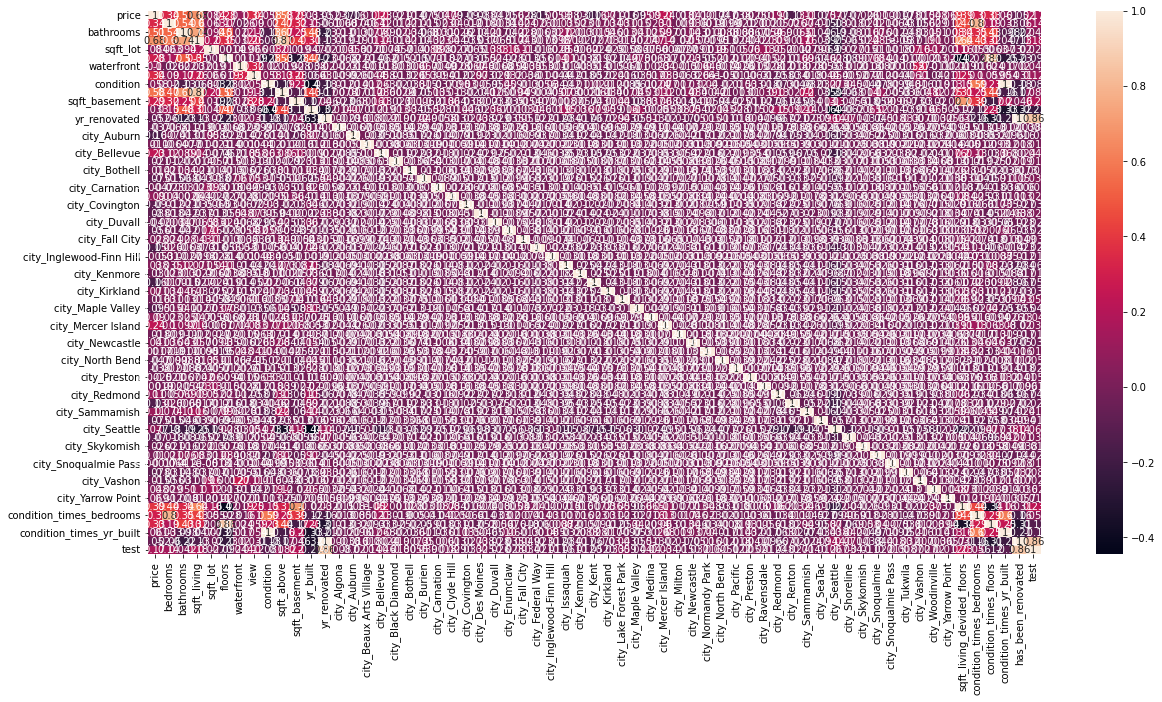

In [14]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True) 
plt.show()

In [15]:
X = df.drop("price", axis="columns")
y = df["price"]

# Devide training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Find correlation
#corr_matrix = df.corr()
#corr_matrix["price"].sort_values(ascending=False)

In [16]:
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price                         1.000000
sqft_living                   0.676772
sqft_above                    0.576759
bathrooms                     0.514726
sqft_living_devided_floors    0.387395
                                ...   
city_Maple Valley            -0.095331
city_Renton                  -0.134785
city_Federal Way             -0.146201
city_Auburn                  -0.157590
city_Kent                    -0.162759
Name: price, Length: 63, dtype: float64

In [17]:
# Gradient Boosting
gb_clf = ensemble.GradientBoostingRegressor(learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.5)
gb_clf.fit(X_train, y_train)

# Cross-val-score
scores = cross_val_score(gb_clf, X_train, y_train, scoring="neg_mean_absolute_error", cv=5)
print("MAE = " + str(-scores.mean()))
# Cross-val-score
r2_scores = cross_val_score(gb_clf, X_train, y_train, scoring="r2", cv=5)
print("r2 = " + str(r2_scores.mean()))

MAE = 101099.64806251804
r2 = 0.7068637046223041


In [18]:
def show_results(y_Test, Pred): 
    print('MAE on Test set :',metrics.mean_absolute_error(y_Test, Pred))
    print("\n")
    print('MSE on Test set :',metrics.mean_squared_error(y_Test, Pred))
    print("\n")
    print('RMSE on Test set :',np.sqrt(metrics.mean_absolute_error(y_Test, Pred)))
    print("\n")
    print('R2 Score on Test set :',metrics.r2_score(y_Test, Pred))
    print("\n")

In [19]:
y_pred = gb_clf.predict(X_test)
show_results(y_test, y_pred)

MAE on Test set : 93200.56416055522


MSE on Test set : 22132443626.209343


RMSE on Test set : 305.2876744327475


R2 Score on Test set : 0.6961785813612839




In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
show_results(y_test, lr_y_pred)

MAE on Test set : 412972316172636.2


MSE on Test set : 7.6839903815407355e+31


RMSE on Test set : 20321720.305442553


R2 Score on Test set : -1.0548138732233607e+21




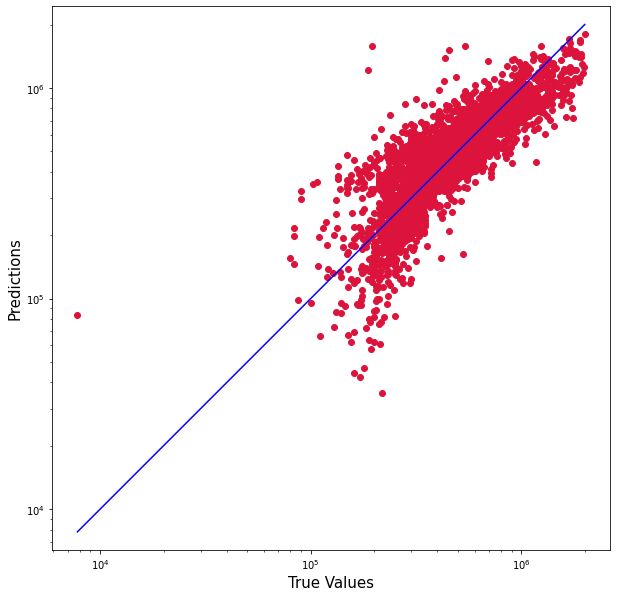

In [21]:
plt.figure(figsize=(10,10))
true_value = y_train
predicted_value = lr.predict(X_train)
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [22]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scipy in c:\users\timmy\anaconda3\lib\site-packages (from lightgbm->lazypredict) (1.7.3)



In [23]:
#from lazypredict.Supervised import LazyRegressor
#reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
#models, predictions = reg.fit(X_train, X_test, y_train, y_test)
#print(models)